In [11]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [8]:
# importing the required dataset "Housing.csv"
dataset = pd.read_csv(r"D:\OneDrive\Desktop\Notes\BHARAT\Housing.csv")

# coverting categorical data into numeric values
dataset['mainroad'].replace(['no', 'yes'], [0, 1], inplace=True)
dataset['guestroom'].replace(['no', 'yes'], [0, 1], inplace=True)
dataset['basement'].replace(['no', 'yes'], [0, 1], inplace=True)
dataset['hotwaterheating'].replace(['no', 'yes'], [0, 1], inplace=True)
dataset['airconditioning'].replace(['no', 'yes'], [0, 1], inplace=True)
dataset['prefarea'].replace(['no', 'yes'], [0, 1], inplace=True)
dataset['furnishingstatus'].replace(['unfurnished', 'semi-furnished', 'furnished'], [0, 1, 2], inplace=True)

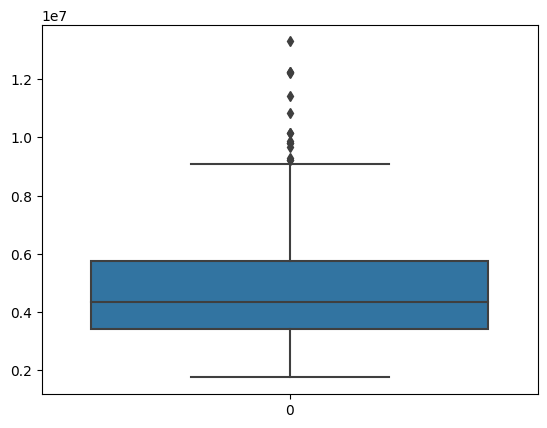

In [12]:
# box plot to identify outliers
sns.boxplot(dataset['price'])

# dataset outlier removal
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataset = dataset[dataset.apply(lambda x: ((x >= lower_bound) & (x <= upper_bound)).all(), axis=1)]

X = dataset.drop('price', axis=1)
y = dataset['price']

# removing non-linear relationships
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 860866752121.3251
R-squared: 0.503596486240351
